In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [3]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df['Exited'].value_counts()/len(df['Exited'])

Exited
0    0.7963
1    0.2037
Name: count, dtype: float64

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:

df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df1=df.groupby('Gender')['Exited'].value_counts()

In [11]:
df1

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: count, dtype: int64

In [12]:
df1=df.groupby('Gender')['Geography'].value_counts()

In [13]:
df1

Gender  Geography
Female  France       2261
        Germany      1193
        Spain        1089
Male    France       2753
        Spain        1388
        Germany      1316
Name: count, dtype: int64

In [14]:
df1=df.groupby('Geography')['Exited'].value_counts()

In [15]:
df1

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

In [16]:
df.drop(columns=['Gender','Surname','CustomerId','RowNumber'],axis =1, inplace=True)
df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0
9996,516,France,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1


In [17]:
df['CreditScore'].min()

350

In [18]:
df['Age'].min()

18

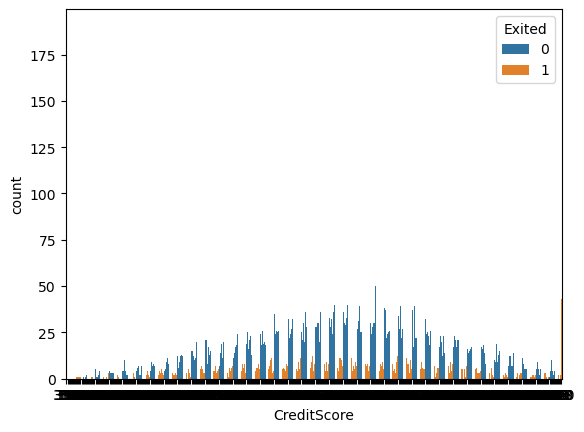

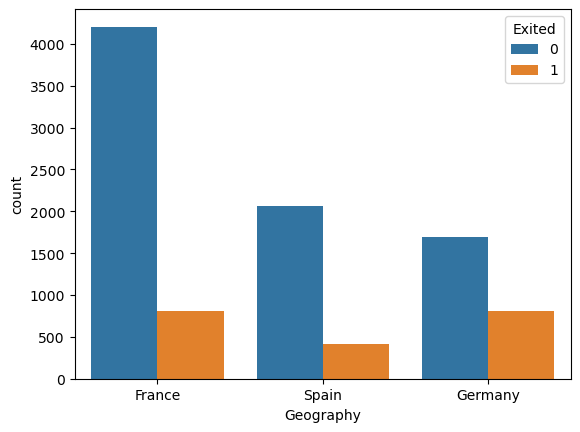

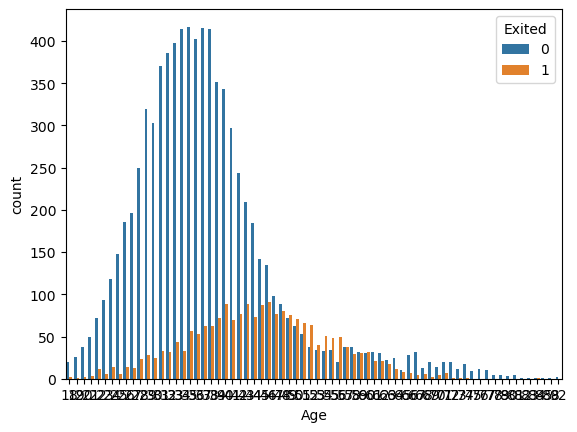

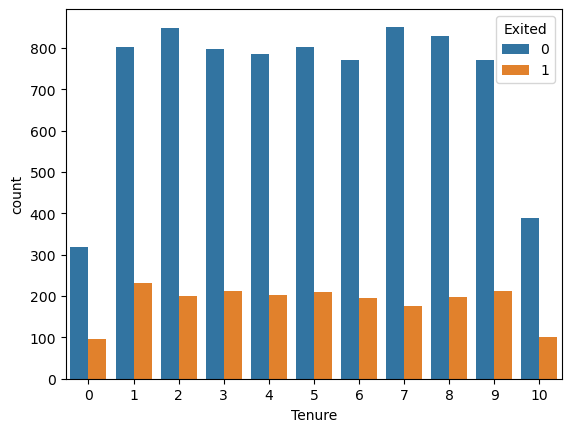

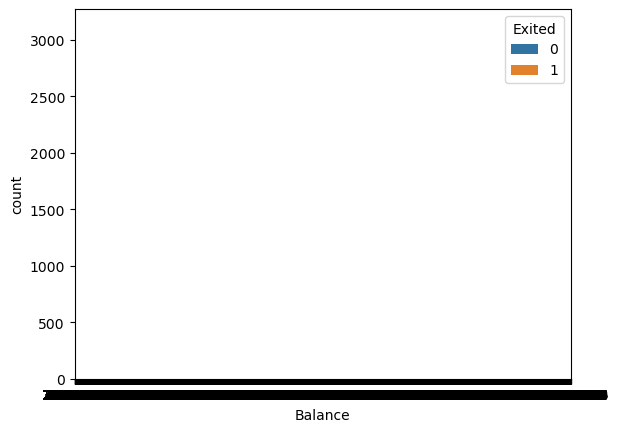

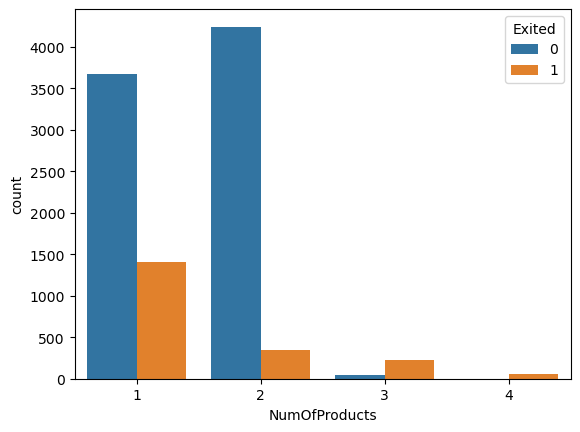

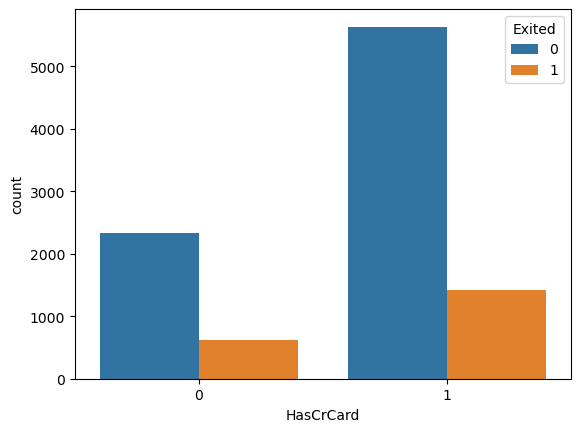

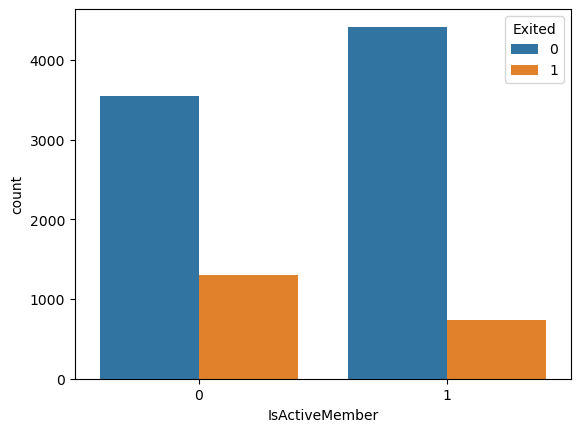

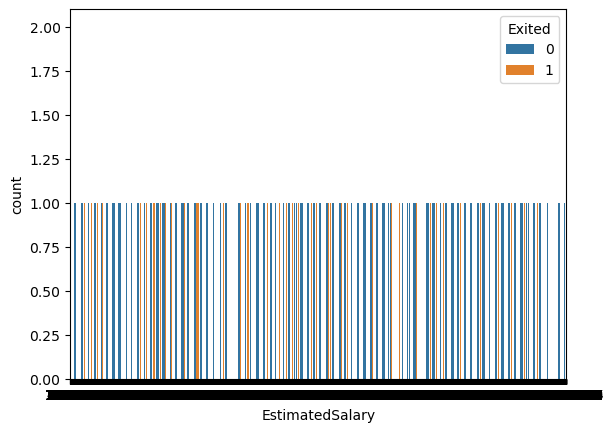

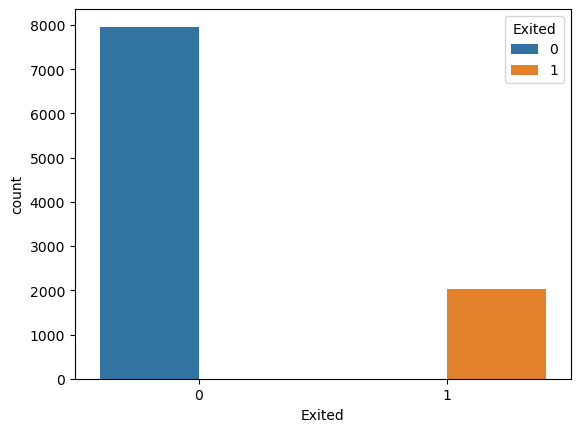

In [19]:
for i , predictor in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(data=df,x=predictor, hue='Exited')

In [20]:
df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0
9996,516,France,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1


In [21]:
df_dummies=pd.get_dummies(df)
df_dummies = df_dummies.astype(int)
df=df_dummies

In [22]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,1,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,1,0,0
3,699,39,1,0,2,0,0,93826,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0
9996,516,35,10,57369,1,1,1,101699,0,1,0,0
9997,709,36,7,0,1,0,1,42085,1,1,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1,0


C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\756387939.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.CreditScore[(df['Exited']==0)],color='Red', shade=True)
C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\756387939.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.CreditScore[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)


Text(0.5, 1.0, 'CreditScore by churn')

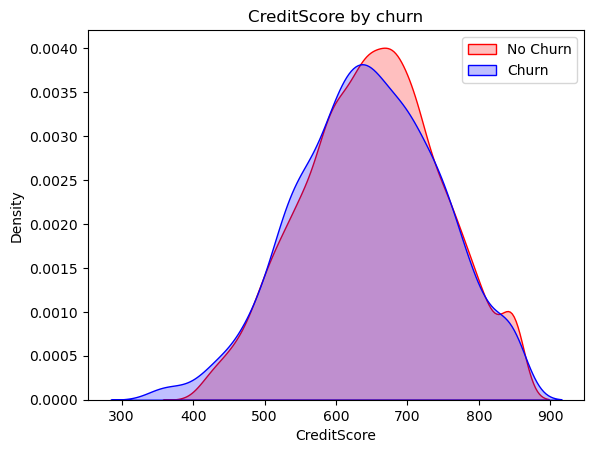

In [23]:
Mth=sns.kdeplot(df.CreditScore[(df['Exited']==0)],color='Red', shade=True)
Mth=sns.kdeplot(df.CreditScore[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('CreditScore')
Mth.set_title('CreditScore by churn')

C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\2172639373.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.EstimatedSalary[(df['Exited']==0)],color='Red', shade=True)
C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\2172639373.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.EstimatedSalary[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)


Text(0.5, 1.0, 'EstimatedSalary by churn')

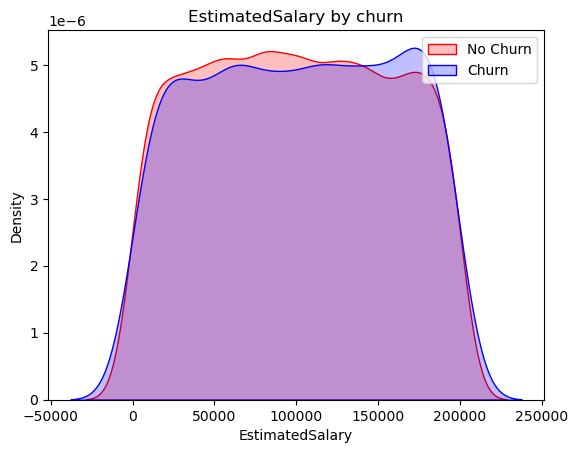

In [24]:
Mth=sns.kdeplot(df.EstimatedSalary[(df['Exited']==0)],color='Red', shade=True)
Mth=sns.kdeplot(df.EstimatedSalary[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('EstimatedSalary')
Mth.set_title('EstimatedSalary by churn')

C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\1948891067.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.Age[(df['Exited']==0)],color='Red', shade=True)
C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\1948891067.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.Age[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)


Text(0.5, 1.0, 'Age by churn')

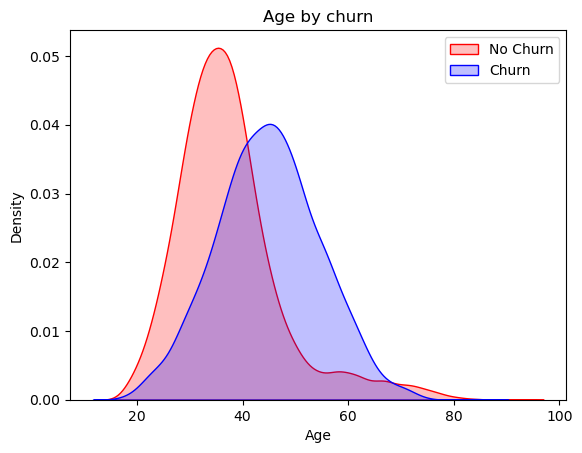

In [25]:
Mth=sns.kdeplot(df.Age[(df['Exited']==0)],color='Red', shade=True)
Mth=sns.kdeplot(df.Age[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Age')
Mth.set_title('Age by churn')

C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\2069345793.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.Balance[(df['Exited']==0)],color='Red', shade=True)
C:\Users\anjan\AppData\Local\Temp\ipykernel_17612\2069345793.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(df.Balance[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)


Text(0.5, 1.0, 'Balance by churn')

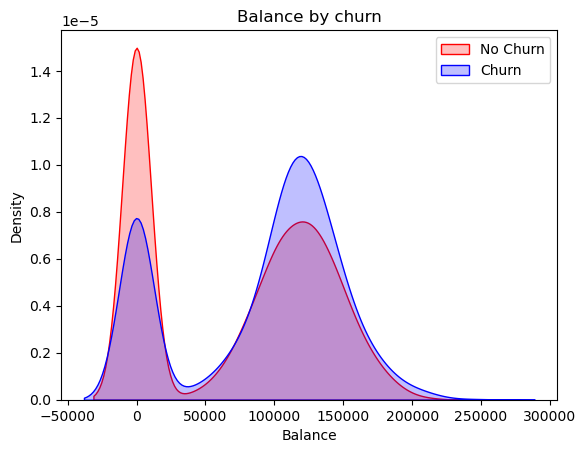

In [26]:
Mth=sns.kdeplot(df.Balance[(df['Exited']==0)],color='Red', shade=True)
Mth=sns.kdeplot(df.Balance[(df['Exited']==1)],ax=Mth, color='Blue', shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Balance')
Mth.set_title('Balance by churn')

<Axes: >

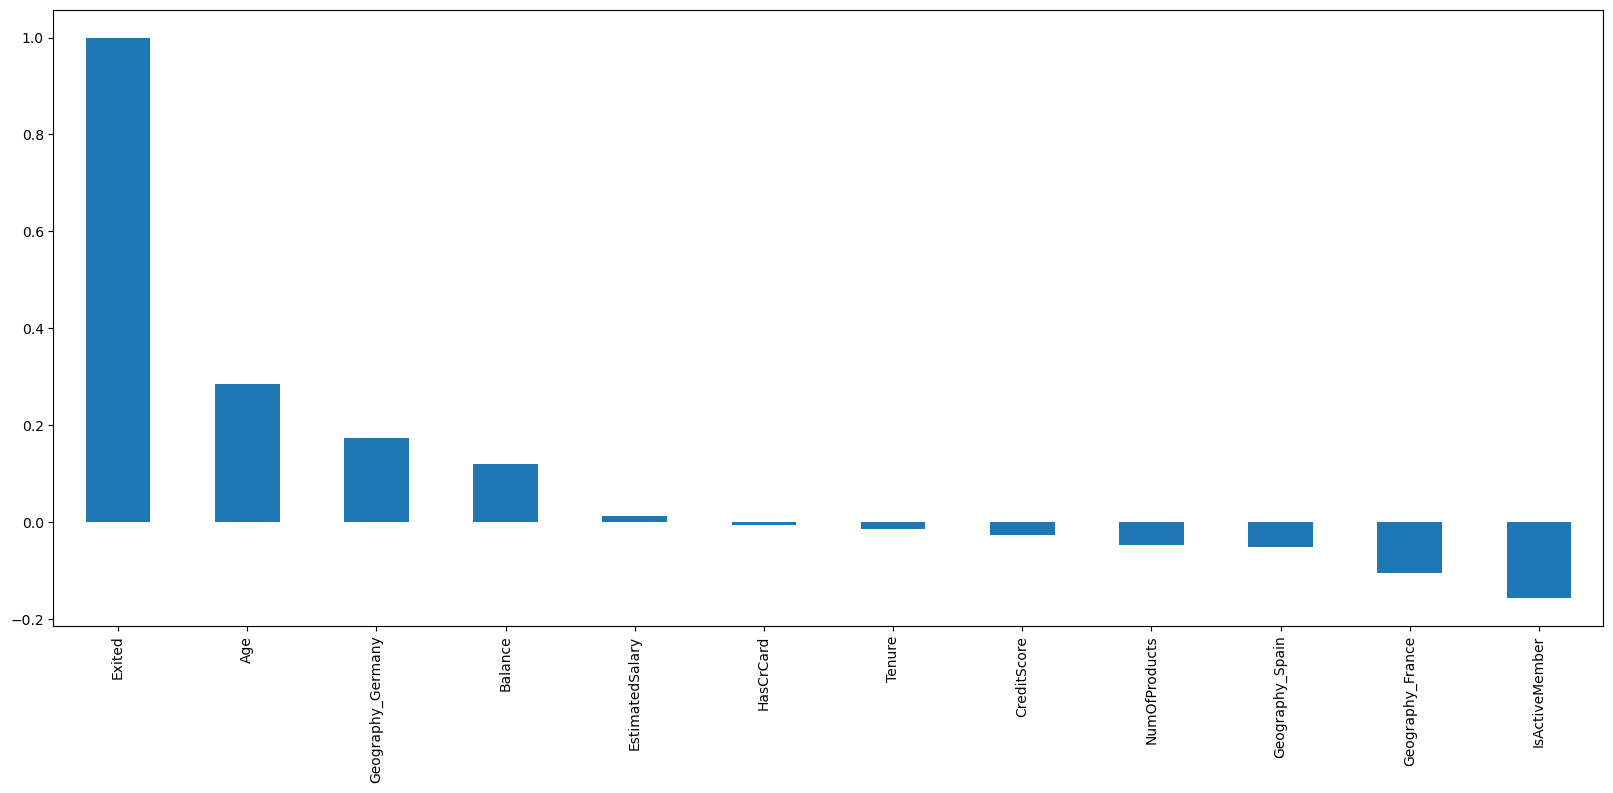

In [27]:
plt.figure(figsize=(20,8))
df.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

In [28]:
df.to_csv('churn_model')

In [29]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [30]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [31]:
df1=pd.read_csv('churn_model')
df1.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,619,42,2,0,1,1,1,101348,1,1,0,0
1,1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,2,502,42,8,159660,3,1,0,113931,1,1,0,0
3,3,699,39,1,0,2,0,0,93826,0,1,0,0
4,4,850,43,2,125510,1,1,1,79084,0,0,0,1


In [32]:
X=df1.drop(['Exited','Unnamed: 0'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0
3,699,39,1,0,2,0,0,93826,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,1,0,0
9996,516,35,10,57369,1,1,1,101699,1,0,0
9997,709,36,7,0,1,0,1,42085,1,0,0
9998,772,42,3,75075,2,1,0,92888,0,1,0


In [33]:
y=df1['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(y_test, y_pred)

In [41]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.45%


In [42]:
model_dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [43]:
#model_dt.fit(X_train,y_train)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\anjan\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [45]:
model_dt = grid_search.best_estimator_

In [46]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [47]:
y_pred = model_dt.predict(X_test)

In [48]:
test_accuracy = accuracy_score(y_test, y_pred)

In [49]:
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8535


In [50]:
z=X.iloc[0].to_numpy()
z1=z.reshape(1,-1)

In [51]:
y_pred = model_dt.predict(z1)
print(y_pred)

[0]


C:\Users\anjan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
